# 离散时间模型

#### 黄荣贵（复旦大学）

## 读入数据

In [1]:
library(foreign)

promoption = read.dta("datasets/promotion.dta")

head(promoption)

dur,event,undgrad,phdmed,phdprest,art1,art2,art3,art4,art5,⋯,cit5,cit6,cit7,cit8,cit9,cit10,prest1,prest2,jobtime,id
10,0,7.00,0,2.21,0,0,2,2,2,⋯,1,1,1,1,1,1,2.36,2.36,NA,1
4,1,6.00,0,2.21,8,10,14,18,NA,⋯,NA,NA,NA,NA,NA,NA,1.84,2.88,3,2
4,0,4.95,0,2.21,0,0,0,2,NA,⋯,NA,NA,NA,NA,NA,NA,2.40,2.40,NA,3
10,0,2.00,1,4.54,2,3,3,3,3,⋯,17,20,24,24,24,24,2.56,2.56,NA,4
7,1,5.00,1,2.15,1,1,1,2,2,⋯,19,20,23,NA,NA,NA,2.40,2.40,NA,5
6,1,4.95,0,4.54,0,2,3,5,5,⋯,6,11,NA,NA,NA,NA,3.36,3.36,NA,6


## 生存对象的表示

In [2]:
library(survival)

with(promoption, Surv(time=dur, event=event))

Warning message:
“package ‘survival’ was built under R version 3.4.4”

  [1] 10+  4   4+ 10+  7   6  10+  6   4+  5   6   6+  7   6   5   4   7+  7 
 [19]  5   5   3  10+  6  10+  7   4   9+  5   5   8   5   8   4   4   4   4+
 [37]  4   8  10+  4   5+  9   6   5   3+  5   8   5+  3+  5   4+  6   4   3+
 [55]  4   4   6   5  10+  4   4   7  10+  5   9+  7   4  10   6   6   3   6 
 [73]  9   8   7+  4   5   3+  9+  9+  9   7+  4   8   6+  5  10   5   6   7 
 [91]  7+  3   5   5   5   4   4   3   7   2+  8  10+  7   6   6   5+  7   6 
[109]  8   3   4   6   5   8   8+ 10+  7   6   5   4   7   9+  3+  4+  6   6+
[127]  5   3   5   3+  8   2+ 10+  5   5   7  10   6+  5   4   3   6   7   4 
[145]  4   6   4+ 10+  4  10+  3   4   5+  5   6   3   3   5   5   6   2   6 
[163]  5   7   9   6   6   5   5   6   9   7   4  10+  6+  4+  6+  7   6   4 
[181]  5   6+  5   9+  7  10+  4   3+  4+  3+  3+  6   2+  3   4   7   6   7+
[199]  2+  7   5   7   4   5   4+  7   5+  4   7   6   3   5   6   6   7   3 
[217]  1+  4   5+ 10+  2+  6   7   7  10+  4  10+  3+  6   5   5

In [3]:
promoption$surv = with(promoption, Surv(time=dur, event=event))

## 生存分析

In [4]:
summary(survfit(surv~1, data=promoption))

Call: survfit(formula = surv ~ 1, data = promoption)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    301       1    0.997 0.00332        0.990        1.000
    2    299       1    0.993 0.00469        0.984        1.000
    3    292      17    0.936 0.01431        0.908        0.964
    4    263      42    0.786 0.02431        0.740        0.835
    5    211      53    0.589 0.02970        0.533        0.650
    6    149      46    0.407 0.03030        0.352        0.471
    7     96      31    0.276 0.02825        0.225        0.337
    8     59      15    0.205 0.02622        0.160        0.264
    9     42       7    0.171 0.02484        0.129        0.228
   10     29       4    0.148 0.02406        0.107        0.203

In [5]:
summary(survfit(Surv(time=dur, event=event)~1, data=promoption))

Call: survfit(formula = Surv(time = dur, event = event) ~ 1, data = promoption)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    301       1    0.997 0.00332        0.990        1.000
    2    299       1    0.993 0.00469        0.984        1.000
    3    292      17    0.936 0.01431        0.908        0.964
    4    263      42    0.786 0.02431        0.740        0.835
    5    211      53    0.589 0.02970        0.533        0.650
    6    149      46    0.407 0.03030        0.352        0.471
    7     96      31    0.276 0.02825        0.225        0.337
    8     59      15    0.205 0.02622        0.160        0.264
    9     42       7    0.171 0.02484        0.129        0.228
   10     29       4    0.148 0.02406        0.107        0.203

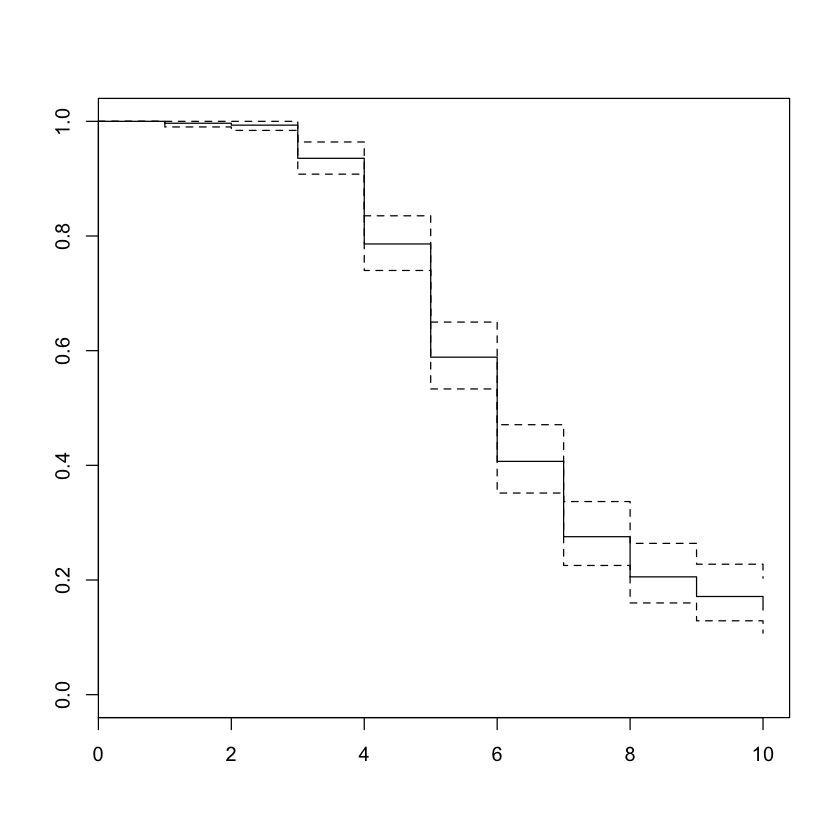

In [6]:
plot(survfit(Surv(time=dur, event=event)~1, data=promoption))

## 生成“人-时期”数据

In [7]:
summary(promoption$dur)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   5.000   5.784   7.000  10.000 

In [8]:
print(promoption[1:2,c("dur", "event", "id")])

  dur event id
1  10     0  1
2   4     1  2


In [9]:
survSplit(Surv(time=dur, event=event)~id, cut=seq(0,10), 
          data=promoption[1:2,])

id,tstart,dur,event
1,0,1,0
1,1,2,0
1,2,3,0
1,3,4,0
1,4,5,0
1,5,6,0
1,6,7,0
1,7,8,0
1,8,9,0
1,9,10,0


In [10]:
survSplit(Surv(time=dur, event=event)~id, cut=seq(0,10,2), 
          data=promoption[1:2,])

id,tstart,dur,event
1,0,2,0
1,2,4,0
1,4,6,0
1,6,8,0
1,8,10,0
2,0,2,0
2,2,4,1


In [11]:
survSplit(Surv(time=dur, event=event)~id+undgrad+phdmed+phdprest, 
          cut=seq(0,10), data=promoption[1:2,], episode="year")

id,undgrad,phdmed,phdprest,tstart,dur,event,year
1,7,0,2.21,0,1,0,2
1,7,0,2.21,1,2,0,3
1,7,0,2.21,2,3,0,4
1,7,0,2.21,3,4,0,5
1,7,0,2.21,4,5,0,6
1,7,0,2.21,5,6,0,7
1,7,0,2.21,6,7,0,8
1,7,0,2.21,7,8,0,9
1,7,0,2.21,8,9,0,10
1,7,0,2.21,9,10,0,11


In [12]:
promLong = survSplit(Surv(time=dur, event=event)~id+undgrad+phdmed+phdprest, 
          cut=seq(0,10), data=promoption, episode="year")

head(promLong)

id,undgrad,phdmed,phdprest,tstart,dur,event,year
1,7,0,2.21,0,1,0,2
1,7,0,2.21,1,2,0,3
1,7,0,2.21,2,3,0,4
1,7,0,2.21,3,4,0,5
1,7,0,2.21,4,5,0,6
1,7,0,2.21,5,6,0,7


## 离散时间模型

In [13]:
fit = glm(event~undgrad+phdmed+phdprest+factor(year), 
          data=promLong, family = binomial)

summary(fit)


Call:
glm(formula = event ~ undgrad + phdmed + phdprest + factor(year), 
    family = binomial, data = promLong)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0628  -0.6196  -0.3136  -0.0774   3.4056  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -6.671891   1.081530  -6.169 6.88e-10 ***
undgrad         0.157661   0.060070   2.625 0.008675 ** 
phdmed         -0.095003   0.166518  -0.571 0.568319    
phdprest        0.065037   0.085449   0.761 0.446583    
factor(year)3   0.006304   1.416672   0.004 0.996449    
factor(year)4   2.923037   1.032530   2.831 0.004641 ** 
factor(year)5   4.051510   1.015902   3.988 6.66e-05 ***
factor(year)6   4.619307   1.014388   4.554 5.27e-06 ***
factor(year)7   4.924626   1.017591   4.839 1.30e-06 ***
factor(year)8   4.992069   1.025680   4.867 1.13e-06 ***
factor(year)9   4.690531   1.046301   4.483 7.36e-06 ***
factor(year)10  4.167770   1.085171   3.841 0.000123 ***
factor(year)11  

In [14]:
exp(coef(fit))

(Intercept)        undgrad         phdmed       phdprest  factor(year)3 
  1.266003e-03   1.170769e+00   9.093699e-01   1.067199e+00   1.006324e+00 
 factor(year)4  factor(year)5  factor(year)6  factor(year)7  factor(year)8 
  1.859768e+01   5.748417e+01   1.014237e+02   1.376378e+02   1.472407e+02 
 factor(year)9 factor(year)10 factor(year)11 
  1.089110e+02   6.457128e+01   5.270102e+01

## 时变变量的处理

使用reshape函数对数据进行变化，然后将时变数据与上述数据合并。

In [15]:
p2 = promoption[, c(6:25, 29),]

# names(p2)[1:10] = paste("art", 1:10, sep=".")
# names(p2)[11:20] = paste("cit", 1:10, sep=".")

print(p2[1:3, 1:10])

print(p2[1:3, 11:20])

  art1 art2 art3 art4 art5 art6 art7 art8 art9 art10
1    0    0    2    2    2    2    2    2    2     2
2    8   10   14   18   NA   NA   NA   NA   NA    NA
3    0    0    0    2   NA   NA   NA   NA   NA    NA
  cit1 cit2 cit3 cit4 cit5 cit6 cit7 cit8 cit9 cit10
1    0    0    1    1    1    1    1    1    1     1
2   27   44   57   63   NA   NA   NA   NA   NA    NA
3    0    0    0    2   NA   NA   NA   NA   NA    NA


In [16]:
tvvs = reshape(p2, varying =list(1:10, 11:20), direction = "long", 
               v.names=c("art", "cit"), idvar = "id")


head(tvvs, 10)

,id,time,art,cit
1.1,1,1,0,0
2.1,2,1,8,27
3.1,3,1,0,0
4.1,4,1,2,11
5.1,5,1,1,14
6.1,6,1,0,0
7.1,7,1,5,29
8.1,8,1,3,19
9.1,9,1,8,41
10.1,10,1,0,0


In [17]:
tvvs2 = tvvs[order(tvvs$id, tvvs$time), ]

head(tvvs2, 25)

,id,time,art,cit
1.1,1,1,0,0
1.2,1,2,0,0
1.3,1,3,2,1
1.4,1,4,2,1
1.5,1,5,2,1
1.6,1,6,2,1
1.7,1,7,2,1
1.8,1,8,2,1
1.9,1,9,2,1
1.10,1,10,2,1


In [18]:
dat = merge(promLong, tvvs2, by.x = c("id", "dur"), by.y=c("id", "time"), all.x=TRUE, all.y=FALSE)

dat = dat[order(dat$id, dat$dur), ]

head(dat, 25)

,id,dur,undgrad,phdmed,phdprest,tstart,event,year,art,cit
1,1,1,7.00,0,2.21,0,0,2,0,0
3,1,2,7.00,0,2.21,1,0,3,0,0
4,1,3,7.00,0,2.21,2,0,4,2,1
5,1,4,7.00,0,2.21,3,0,5,2,1
6,1,5,7.00,0,2.21,4,0,6,2,1
7,1,6,7.00,0,2.21,5,0,7,2,1
8,1,7,7.00,0,2.21,6,0,8,2,1
9,1,8,7.00,0,2.21,7,0,9,2,1
10,1,9,7.00,0,2.21,8,0,10,2,1
2,1,10,7.00,0,2.21,9,0,11,2,1


### 含时变自变量的离散时间模型

In [19]:
fit2 = glm(event~undgrad+phdmed+phdprest+factor(dur) + art + cit, 
          data=dat, family = binomial)

summary(fit2)


Call:
glm(formula = event ~ undgrad + phdmed + phdprest + factor(dur) + 
    art + cit, family = binomial, data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6026  -0.5860  -0.2756  -0.0731   3.4148  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -6.6729292  1.0858717  -6.145 7.98e-10 ***
undgrad        0.1688646  0.0617052   2.737 0.006207 ** 
phdmed        -0.2231532  0.1712024  -1.303 0.192422    
phdprest      -0.0289910  0.0901804  -0.321 0.747849    
factor(dur)2  -0.0839946  1.4171381  -0.059 0.952737    
factor(dur)3   2.7339232  1.0338563   2.644 0.008184 ** 
factor(dur)4   3.8041992  1.0174254   3.739 0.000185 ***
factor(dur)5   4.3082021  1.0164198   4.239 2.25e-05 ***
factor(dur)6   4.5450881  1.0207418   4.453 8.48e-06 ***
factor(dur)7   4.5984339  1.0297020   4.466 7.98e-06 ***
factor(dur)8   4.2437209  1.0519406   4.034 5.48e-05 ***
factor(dur)9   3.6798375  1.0959955   3.358 0.000786 ***
factor(dur

## 进一步阅读材料
* https://rpubs.com/corey_sparks/63970

* [discSurv程序包](https://cran.r-project.org/web/packages/discSurv/index.html)

* https://cran.r-project.org/web/views/Survival.html